In [2]:
# You may need to install libraries
! pip3 install pandas
! pip3 install nltk
! pip3 install scikit-learn
! pip3 install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.5 MB/s eta 0:00:0000:0100:01


In [45]:
import pandas
import numpy
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.svm as svm

Loading the Dataset


In [5]:
df = pandas.read_csv('loan.csv')

In [18]:
df.isnull().sum()
df.Loan_Status.value_counts()
df= df.dropna()


In [26]:
df=df.replace({"Loan_Status":{"N":0,"Y":1}})
df=df.replace(to_replace='3+',value=4)
df.Dependents.value_counts()
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Property_Area', ylabel='count'>

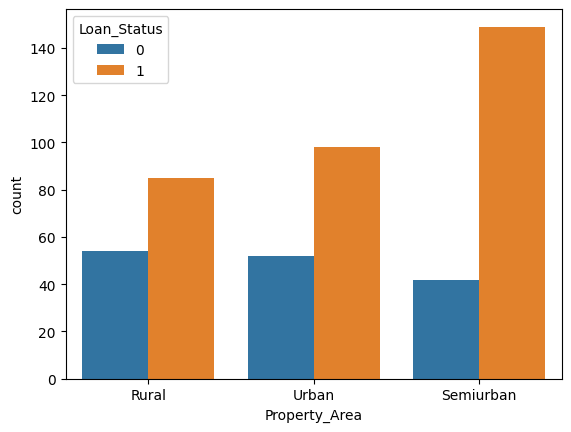

In [36]:
sns.countplot(x='Property_Area',hue="Loan_Status",data = df)

In [38]:
df = df.replace({
    "Married":{"Yes":1,"No":0},
    "Gender":{"Male":1,"Female":0},
    "Education":{"Graduate":1,"Not Graduate":0},
    "Property_Area":{"Rural":0,"Semiurban":1, "Urban":2},
    "Self_Employed":{"Yes":1,"No":0}
})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [41]:
features = df.drop(columns=["Loan_ID",'Loan_Status'],axis=1)
label = df.Loan_Status

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(features,label,test_size=0.2,random_state=1, stratify=label)

In [57]:
model = svm.SVC(kernel='linear')

In [53]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [54]:
pred = model.predict(X_test)

In [55]:
accuracy_score(pred,Y_test)

0.7916666666666666